<img src="sunpy_logo.svg">

<h3><center>Andrew Inglis</center></h3>
<p><center>SunPy workshop - NASA Goddard Space Flight Center</center></p>
<p><center>25th May 2017</center></p>

# What is SunPy?
### A community-developed, free and open-source solar data analysis environment for Python.

website: [http://www.sunpy.org](http://www.sunpy.org)<br>
docs: [http://docs.sunpy.org](http://docs.sunpy.org)<br>
code (version control!): [https://github.com/sunpy/sunpy](https://github.com/sunpy/sunpy)

SunPy is built upon foundational libraries which enable scientific computing in Python which includes

+ [NumPy](http://numpy.org)
+ [SciPy](http://scipy.org)
+ [matplotlib](http://matplotlib.org)
+ [Astropy](http://astropy.org)

SunPy is an open project - anyone is free to contribute to it's development.

### Current status of SunPy - version 0.8 coming soon!

SunPy Version 0.8 is very close to release - see Stuart Mumford for more details.

New features, including:
  - Python 3 compatibility
  - Unified downloader (FIDO)
  - Refactor of lightcurve/timeseries objects. Replacing `LightCurve` with `TimeSeries`.
  - World Coordinate Systems (WCS) integration.
  
Additionally, a number of other features remain in development for future releases. This summer we have three Google Summer of Code (GSOC) students working on various projects, e.g.
  - IrisPy: tools to support use of IRIS data
  - Sunkit-image: Image processing and transformation tools.
  - SunPy website improvements.
  



 ----------------------

# Using SunPy for your research - a quick tour

SunPy is available to use *now* - here we will demonstrate some of the key features available to users.


### First steps
Python is modular - here we do some initial setup, importing modules we are going to need.

In [1]:
import numpy as np
import astropy.units as u
from IPython.display import HTML
import matplotlib
import glob
import matplotlib.pyplot as plt
%matplotlib inline

Now import sunpy itself:

In [2]:
import sunpy

We can check which version of SunPy we are running:

In [3]:
sunpy.system_info()

 SunPy Installation Information


###########
 General
###########
Time : Monday, 22. May 2017 09:45PM UT
System : Darwin
Processor : i386
Arch : 64bit
SunPy : 0.8.dev7910
SunPy_git : 00acc00fa7a84e726bf9a6decd35a19ef3e114d7
OS: Mac OS X 10.12.5 (i386)


###########
 Required Libraries 
###########
Python: 2.7.13
NumPy: 1.11.3
SciPy: 0.19.0
matplotlib: 1.5.1
Astropy: 1.3.2
Pandas: 0.20.1


###########
 Recommended Libraries 
###########
beautifulsoup: 4.5.3
PyQt: 4.11.4
SUDS: 0.4
Sqlalchemy: 1.1.5
Requests: 2.12.4


## 1. Working with solar image data in SunPy

SunPy is object based. SunPy has a *`Map`* object type that supports 2D images, it makes it simple to read data in from any filetype supported in `sunpy.io` including FITS and JPEG2000 files. 

You can also create *`MapCube`* objects from a set of solar images, for example a sequence of SDO/AIA images.

Here is an example of using SunPy to analyse solar images. First, we import the map functionality from SunPy:

In [4]:
from sunpy import map

Now let's create a Map image object from a file.

In [5]:
ls

AIA20110607_061207_0193.fits
AIA20110607_061407_0193.fits
AIA20110607_061607_0193.fits
AIA20110607_061807_0193.fits
AIA20110607_062007_0193.fits
AIA20110607_062209_0193.fits
AIA20110607_062408_0193.fits
AIA20110607_062610_0193.fits
AIA20110607_062810_0193.fits
AIA20110607_063010_0193.fits
SunPy_Overview.ipynb
lat_spacecraft_weekly_w157_p202_v001.fits
sunpy_logo.svg


In [6]:
aiamap = sunpy.map.Map('AIA20110607_063010_0193.fits')
aiamap

/Users/ainglis/python/sunpy/sunpy/time/time.py:152: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if isinstance(time_string, pandas.tslib.Timestamp):


SunPy Map
---------
Observatory:	 SDO
Instrument:	 AIA 2
Detector:	 AIA
Measurement:	 193.0 Angstrom
Wavelength:	 193.0 Angstrom
Obs Date:	 2011-06-07 06:30:10
dt:		 0.193319 s
Dimension:	 [ 4096.  4096.] pix
scale:		 [ 0.600299  0.600299] arcsec / pix

array([[-5., -5., -5., ..., -5., -5., -5.],
       [-5., -5., -5., ..., -5., -5., -5.],
       [-5., -5., -5., ..., -5., -5., -5.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

Now let's plot the map:

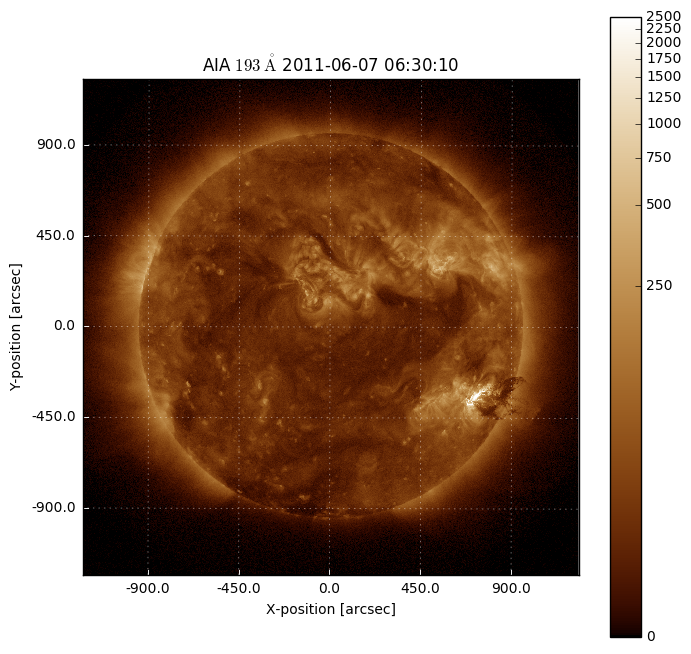

In [7]:
plt.figure(1,figsize=(8,8))
aiamap.plot()
plt.clim([0,2500])
plt.colorbar()
plt.show()

We can easily create a `SubMap` to look at a smaller region of interest on the Sun:

        Use sunpy.coordinates instead. [astropy.utils.decorators]
        Use sunpy.coordinates instead. [astropy.utils.decorators]
        Use sunpy.coordinates instead. [astropy.utils.decorators]
        Use sunpy.coordinates instead. [astropy.utils.decorators]


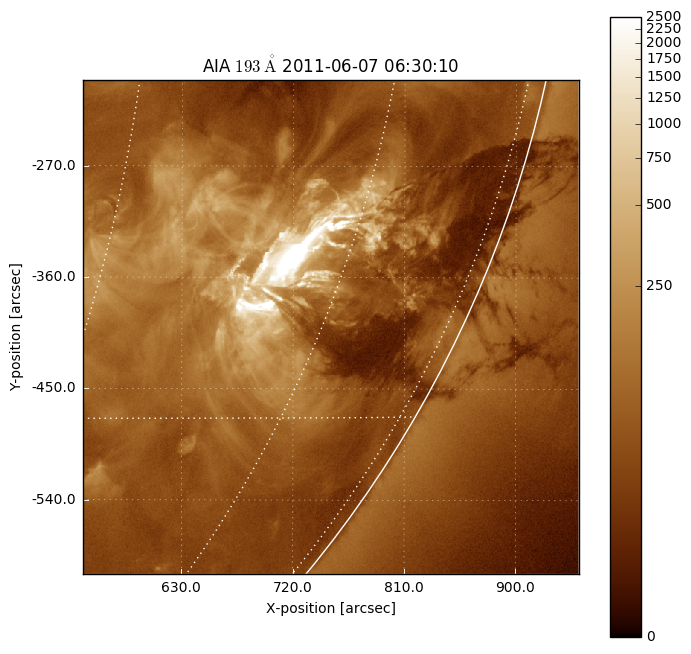

In [8]:
aiamap_zoom = aiamap.submap([550,950]*u.arcsec, [-600,-200]*u.arcsec)

plt.figure(1,figsize=(8,8))
aiamap_zoom.plot()
aiamap_zoom.draw_grid(grid_spacing=20*u.deg)
aiamap_zoom.draw_limb()
plt.clim([0,2500])
plt.colorbar()
plt.show()

### What's inside a Map object?

`Map` objects contain both the image data and the metadata associated with the image. We can access both the data and the metadata inside the map directly:

In [9]:
aiamap.data

array([[-5., -5., -5., ..., -5., -5., -5.],
       [-5., -5., -5., ..., -5., -5., -5.],
       [-5., -5., -5., ..., -5., -5., -5.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [10]:
aiamap.data.max()

15388.0

The standard deviation

In [11]:
aiamap.data.std()

71.508026

The original metadata (stored in a dictionary)

In [12]:
aiamap.meta

MetaDict([('simple', True),
          ('bitpix', 16),
          ('naxis', 2),
          ('naxis1', 4096),
          ('naxis2', 4096),
          ('date_obs', '2011-06-07T06:30:10.33'),
          ('bld_vers', 'V5R12X'),
          ('lvl_num', 1.5),
          ('t_rec', '2011-06-07T06:30:10Z'),
          ('trecstep', 1.0),
          ('trecepoc', '1977.01.01_00:00:00_TAI'),
          ('trecroun', 1),
          ('origin', 'SDO'),
          ('date', '2011-06-11T06:04:52'),
          ('telescop', 'SDO'),
          ('instrume', 'AIA_2'),
          ('date-obs', '2011-06-07T06:30:10.33'),
          ('t_obs', '2011-06-07T06:30:10.42Z'),
          ('camera', 2),
          ('img_type', 'LIGHT'),
          ('exptime', 0.193319),
          ('expsdev', 0.000109),
          ('int_time', 0.460938),
          ('wavelnth', 193),
          ('waveunit', 'angstrom'),
          ('wave_str', '193_THIN'),
          ('fsn', 27194216),
          ('fid', 0),
          ('quallev0', 0),
          ('quality', 0),
     

In [13]:
aiamap.meta.get('rsun_obs')

945.436818

We also provide quick access to some key metadata values as object variables

In [14]:
print(aiamap.date)

2011-06-07 06:30:10.330000


The properties of the map provide a standard way of reading meta data. For instance the pixel scale can be accessed with the `.scale` attribute:

In [15]:
aiamap.scale

Pair(x=<Quantity 0.600299 arcsec / pix>, y=<Quantity 0.600299 arcsec / pix>)

## MapCubes

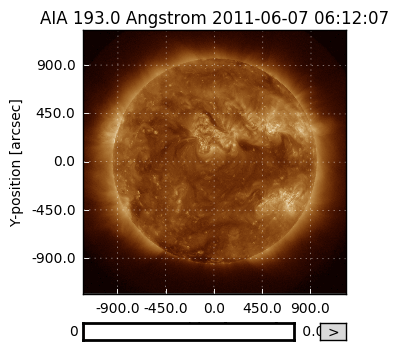

In [17]:
files = glob.glob('*.fits')
cube = map.Map(files,cube=True)
plt.figure(2,figsize=(8,8))
cube.peek()

## 2. Searching for and downloading data using SunPy
SunPy incorporates various tools that allow users to search for and download solar data, including access to the Virtual Solar Observatory (VSO), the Heliophysics Event Knowledgebase (HEK), and in the very near future, the universal downloader (FIDO) for all data types.

## Using the VSO

In [18]:
from sunpy.net import vso

client = vso.VSOClient()
tstart, tend = '2011/6/7 05:30', '2011/6/7 6:30'

In [19]:
lasco_query = client.query(vso.attrs.Time(tstart, tend), vso.attrs.Instrument('lasco'))

In [20]:
len(lasco_query)

8

In [21]:
lasco_query

Start Time [1],End Time [1],Source,Instrument,Type
str19,str19,str4,str5,str6
2011-06-07 05:35:23,2011-06-07 05:35:48,SOHO,LASCO,CORONA
2011-06-07 05:43:09,2011-06-07 05:43:29,SOHO,LASCO,CORONA
2011-06-07 05:50:13,2011-06-07 05:50:38,SOHO,LASCO,CORONA
2011-06-07 05:57:59,2011-06-07 05:58:18,SOHO,LASCO,CORONA
2011-06-07 06:04:58,2011-06-07 06:05:23,SOHO,LASCO,CORONA
2011-06-07 06:12:45,2011-06-07 06:13:04,SOHO,LASCO,CORONA
2011-06-07 06:19:43,2011-06-07 06:20:08,SOHO,LASCO,CORONA
2011-06-07 06:27:29,2011-06-07 06:27:48,SOHO,LASCO,CORONA


now download the data

In [22]:
pathformat = '/Users/ainglis/python/sunpy_introduction/{file}.fits'
results = client.get(lasco_query, path = pathformat)

Check that the files were downloaded:

In [23]:
ls

22375019.fts.fits
22375020.fts.fits
22375021.fts.fits
22375022.fts.fits
32262244.fts.fits
32262245.fts.fits
32262246.fts.fits
32262247.fts.fits
AIA20110607_061207_0193.fits
AIA20110607_061407_0193.fits
AIA20110607_061607_0193.fits
AIA20110607_061807_0193.fits
AIA20110607_062007_0193.fits
AIA20110607_062209_0193.fits
AIA20110607_062408_0193.fits
AIA20110607_062610_0193.fits
AIA20110607_062810_0193.fits
AIA20110607_063010_0193.fits
SunPy_Overview.ipynb
lat_spacecraft_weekly_w157_p202_v001.fits
sunpy_logo.svg


In [24]:
rm *fts.fits

We can build complex queries to the VSO involving multiple instruments:

In [26]:
instrument_condition = ( vso.attrs.Instrument('lasco') | vso.attrs.Detector('cor1') )
coronagraphs = client.query(vso.attrs.Time(tstart, tend), instrument_condition)
len(coronagraphs)

117

In [27]:
coronagraphs

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength
str19,str19,str8,str6,str6,str24
2011-06-07 05:35:23,2011-06-07 05:35:48,SOHO,LASCO,CORONA,None
2011-06-07 05:43:09,2011-06-07 05:43:29,SOHO,LASCO,CORONA,None
2011-06-07 05:50:13,2011-06-07 05:50:38,SOHO,LASCO,CORONA,None
2011-06-07 05:57:59,2011-06-07 05:58:18,SOHO,LASCO,CORONA,None
2011-06-07 06:04:58,2011-06-07 06:05:23,SOHO,LASCO,CORONA,None
2011-06-07 06:12:45,2011-06-07 06:13:04,SOHO,LASCO,CORONA,None
2011-06-07 06:19:43,2011-06-07 06:20:08,SOHO,LASCO,CORONA,None
2011-06-07 06:27:29,2011-06-07 06:27:48,SOHO,LASCO,CORONA,None
2011-06-07 05:30:00,2011-06-07 05:30:01,STEREO_A,SECCHI,CORONA,[ 6500. 6700.] Angstrom


## 3. Working with timeseries data in SunPy

SunPy 0.8 also provides a `TimeSeries` object for dealing with timeseries data, which is currently based on pandas DataFrame objects. `TimeSeries` is replacing the older `LightCurve` object. `TimeSeries` provides the ability to load and manipulate timeseries data from various solar sources.

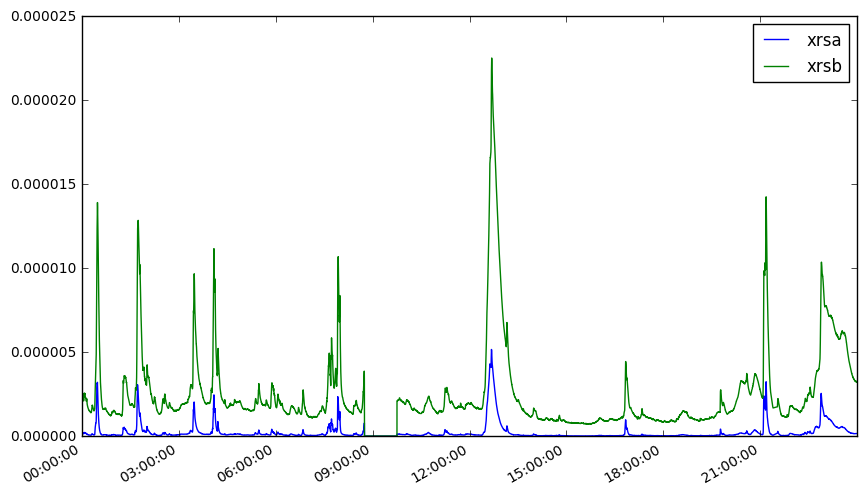

In [51]:
from sunpy import timeseries
goes_lightcurve = timeseries.TimeSeries('/Users/ainglis/sunpy/data/go1520120306.fits')
plt.figure(3,figsize=(10,6))
goes_lightcurve.plot()

As before, we can access the data and metadata from the LightCurve object:

In [52]:
goes_lightcurve.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2012-03-05 23:59:58.244999 | xrsa            | simple: True                                      |
|            to             | xrsb            | bitpix: 8                                         |
|2012-03-06 23:59:56.078999 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | date: 26/06/2012                                  |
|                           |                 | numext: 3                                         |
|                           |                 | telescop: GOES 15                                 |


In [53]:
goes_lightcurve.data

,xrsa,xrsb
2012-03-05 23:59:58.244999,1.888300e-07,0.000002
2012-03-06 00:00:00.291999,1.910600e-07,0.000002
2012-03-06 00:00:02.341999,1.888300e-07,0.000002
2012-03-06 00:00:04.388999,1.843700e-07,0.000002
2012-03-06 00:00:06.438999,1.832600e-07,0.000002
2012-03-06 00:00:08.484999,1.866000e-07,0.000002
2012-03-06 00:00:10.531999,1.932900e-07,0.000002
2012-03-06 00:00:12.581999,1.854900e-07,0.000002
2012-03-06 00:00:14.628999,1.821400e-07,0.000002
2012-03-06 00:00:16.678999,1.843700e-07,0.000002


In [54]:
print goes_lightcurve.data.max()
print goes_lightcurve.data.idxmax()

xrsa    0.000005
xrsb    0.000023
dtype: float32
xrsa   2012-03-06 12:40:43.468999
xrsb   2012-03-06 12:41:08.044999
dtype: datetime64[ns]


## 4. Units and Quantities
SunPy makes use of AstroPy units to keep track of the physical units of variables. This allows unit conversions to be done automatically.

In [32]:
from sunpy.sun import constants

In [33]:
au = constants.au
print au

  Name   = Astronomical Unit
  Value  = 1.495978707e+11
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2012 Resolution B2


In [34]:
au.to('km')

<Quantity 149597870.70000002 km>

In [35]:
speed_of_light = 3e8*(u.meter / u.second)
print au / speed_of_light
print (au / speed_of_light).to('minute')

498.659569 s
8.31099281667 min


Raw values can always be extracted if desired:

In [36]:
print au.value
print speed_of_light.value

1.495978707e+11
300000000.0


## 5. FIDO (Unified Downloader)*
*New feature for v0.8

The unified downloader allows for downloading of data and construction of data objects (e.g. lightcurves) to be more easily separated. It also allows for a single unified search interface for multiple clients at once, e.g. VSO data, lightcurve source data).

In [37]:
from sunpy.net import Fido
from sunpy. net import attrs as a

In [38]:
lyra_query = Fido.search(a.Time('2012/3/4', '2012/3/6'), a.Instrument('lyra'))
lyra_query

Start Time,End Time,Source,Instrument,Wavelength
str19,str19,str6,str4,str3
2012-03-04 00:00:00,2012-03-05 00:00:00,Proba2,lyra,nan
2012-03-05 00:00:00,2012-03-06 00:00:00,Proba2,lyra,nan
2012-03-06 00:00:00,2012-03-07 00:00:00,Proba2,lyra,nan


In [39]:
goes_query = Fido.search(a.Time('2012/3/4', '2012/3/6'), a.Instrument('goes'))
goes_query

Start Time,End Time,Source,Instrument,Wavelength
str19,str19,str4,str4,str3
2012-03-04 00:00:00,2012-03-05 00:00:00,nasa,goes,nan
2012-03-05 00:00:00,2012-03-06 00:00:00,nasa,goes,nan
2012-03-06 00:00:00,2012-03-07 00:00:00,nasa,goes,nan


In [40]:
eve_query = Fido.search(a.Time('2012/3/4', '2012/3/5'), a.Instrument('eve'))
eve_query

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2012-03-04 00:00:00,2012-03-05 00:00:00,SDO,EVE,FULLDISK,1.0 .. 304.0
2012-03-05 00:00:00,2012-03-06 00:00:00,SDO,EVE,FULLDISK,1.0 .. 304.0
2012-03-04 00:00:00,2012-03-04 01:00:00,SDO,EVE,FULLDISK,93.0 .. 1033.0
2012-03-04 01:00:00,2012-03-04 02:00:00,SDO,EVE,FULLDISK,93.0 .. 1033.0
2012-03-04 02:00:00,2012-03-04 03:00:00,SDO,EVE,FULLDISK,93.0 .. 1033.0
2012-03-04 03:00:00,2012-03-04 04:00:00,SDO,EVE,FULLDISK,93.0 .. 1033.0
2012-03-04 04:00:00,2012-03-04 05:00:00,SDO,EVE,FULLDISK,93.0 .. 1033.0
2012-03-04 05:00:00,2012-03-04 06:00:00,SDO,EVE,FULLDISK,93.0 .. 1033.0


FIDO can easily retrieve data from the search results using the fetch command:

In [41]:
downresp = Fido.fetch(goes_query)

[                                        ]========================================


In [42]:
downresp

['/Users/ainglis/sunpy/data/go1520120306.0.fits',
 '/Users/ainglis/sunpy/data/go1520120304.0.fits',
 '/Users/ainglis/sunpy/data/go1520120305.0.fits']

## 6. Instrument specific software
In addition to providing high level objects for all solar data, SunPy provides tools specific to a number of solar instruments, including GOES, LYRA, SDO, RHESSI, Fermi, and LYRA.

In [43]:
from sunpy.instr import goes as goes_tools
from sunpy.instr import fermi as fermi_tools

Convert a GOES flare class to a flux level:

In [44]:
goes_tools.flareclass_to_flux('M2.4')


<Quantity 2.4e-05 W / m2>

Estimate the radiative loss rate using a GOES lightcurve:

/Users/ainglis/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:951: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)


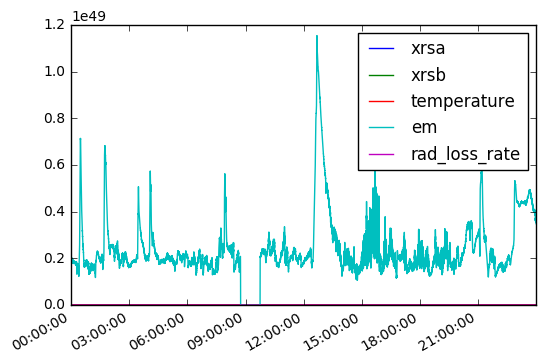

In [45]:
rad = goes_tools.calculate_radiative_loss_rate(goes_lightcurve)
rad.plot()

In [46]:
import datetime
pointing_file = '/Users/ainglis/python/sunpy_introduction/lat_spacecraft_weekly_w157_p202_v001.fits' 
angles = fermi_tools.get_detector_sun_angles_for_time(datetime.datetime(2011,6,7,6,30), pointing_file)
angles

{'n0': <Quantity 85.61475594131147 deg>,
 'n1': <Quantity 68.22585768737807 deg>,
 'n10': <Quantity 122.9473172253441 deg>,
 'n11': <Quantity 168.93092633948964 deg>,
 'n2': <Quantity 58.84698483279163 deg>,
 'n3': <Quantity 68.3897598781803 deg>,
 'n4': <Quantity 57.47471945032046 deg>,
 'n5': <Quantity 10.843180986435911 deg>,
 'n6': <Quantity 114.12133896295099 deg>,
 'n7': <Quantity 128.92576129948125 deg>,
 'n8': <Quantity 122.90646144148057 deg>,
 'n9': <Quantity 128.38610186877352 deg>,
 'time': datetime.datetime(2011, 6, 7, 6, 30, 4, 600000)}

Convert to and from Fermi Mission Elapsed Time (MET) to UTC:

In [47]:
print fermi_tools.utc_to_met(datetime.datetime(2011,6,7,6,30))
print fermi_tools.met_to_utc(329121000.0)

329121000.0
2011-06-07 06:30:00


### Lots more that we didn't have time to mention...

### For more information, visit www.sunpy.org